### Základný opis dát spolu s ich charakteristikami (5b)
V tejto fáze uveďte:
- Počet záznamov, počet atribútov, ich typy,
- Pre zvolené významné atribúty ich distribúcie, základné deskriptívne štatistiky a pod.
- Párová analýza dát: preskúmajte vzťahy medzi zvolenými dvojicami atribútov.
- Párová analýza dát: Identifikujte závislostí medzi dvojicami atribútov (napr. korelácie)
- Párová analýza dát: Identifikujte závislosti medzi predikovanou premennou a ostatnými
premennými (potenciálnymi prediktormi).

In [4]:
import statsmodels.api as sm
import dateparser as dateparser
import matplotlib
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats
import pylab as py
import statsmodels.stats.api as sms

In [22]:
measurements_file = "data/measurements.csv"
measurements_data = pd.read_csv(measurements_file, sep='\t')
reduced_data = pd.read_csv(measurements_file, sep='\t')
replaced_data = pd.read_csv(measurements_file, sep='\t')


stations_file = "data/stations.csv"
stations_data = pd.read_csv(stations_file, sep='\t')

In [23]:
measurements_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12068 entries, 0 to 12067
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PM10       12019 non-null  float64
 1   CO         12019 non-null  float64
 2   Pb         12019 non-null  float64
 3   C2H3NO5    12019 non-null  float64
 4   CFCs       12019 non-null  float64
 5   H2CO       12018 non-null  float64
 6   O3         12020 non-null  float64
 7   TEMP       12020 non-null  float64
 8   NOx        12018 non-null  float64
 9   SO2        12020 non-null  float64
 10  latitude   12068 non-null  float64
 11  longitude  12068 non-null  float64
 12  NH3        12018 non-null  float64
 13  CH4        12018 non-null  float64
 14  PRES       12068 non-null  float64
 15  PM2.5      12020 non-null  float64
 16  warning    12018 non-null  float64
 17  PAHs       12020 non-null  float64
dtypes: float64(18)
memory usage: 1.7 MB


In [7]:
stations_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1110 entries, 0 to 1109
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   QoS        1110 non-null   object 
 1   station    1110 non-null   object 
 2   code       1109 non-null   object 
 3   latitude   1110 non-null   float64
 4   longitude  1110 non-null   float64
 5   revision   1110 non-null   object 
dtypes: float64(2), object(4)
memory usage: 52.2+ KB


### PAHs

In [8]:
measurements_data['PAHs'].describe()

count    12020.000000
mean         8.033075
std          1.908858
min          1.301390
25%          6.625597
50%          8.300640
75%          9.323888
max         16.087840
Name: PAHs, dtype: float64

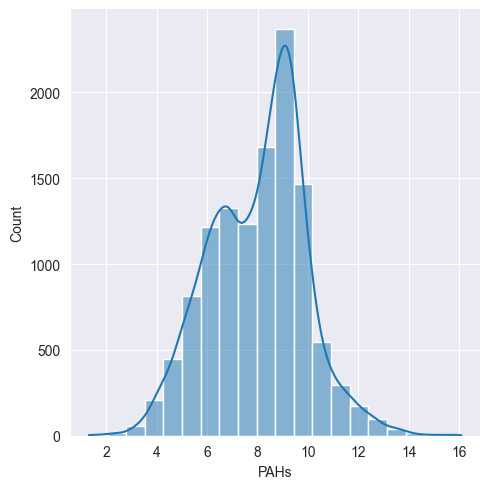

In [9]:
sns.displot(measurements_data['PAHs'], bins=20, kde=True)

<AxesSubplot: xlabel='warning', ylabel='PAHs'>

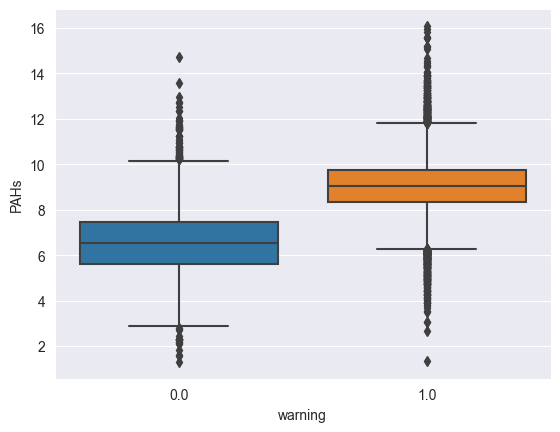

In [10]:
# sns.displot(measurements_data['PAHs'], bins=20, kde=True)
sns.boxplot(x='warning', y='PAHs', data=measurements_data)
# sns.boxplot(x='PAHs', y='warning', data=measurements_data[(measurements_data.warning == 0) | (measurements_data.warning == 1)])

<AxesSubplot: xlabel='warning', ylabel='PAHs'>

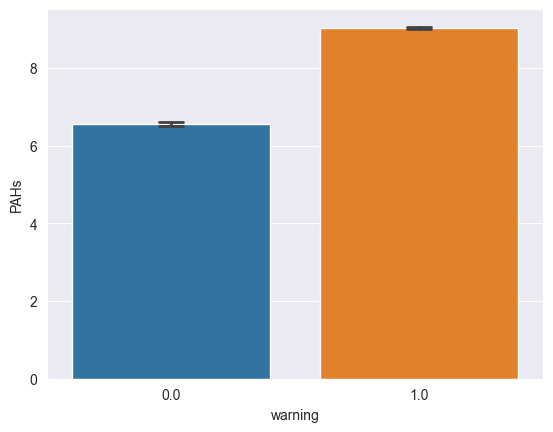

In [11]:
sns.barplot(x='warning', y='PAHs', data=measurements_data, capsize=0.1, errwidth=2)

<AxesSubplot: xlabel='PAHs', ylabel='Count'>

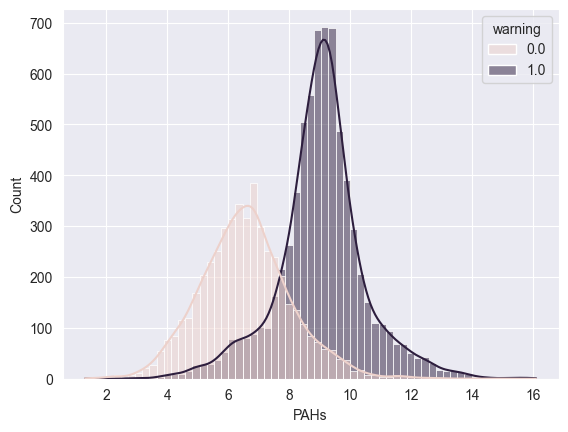

In [12]:
sns.histplot(data=measurements_data, hue='warning', x='PAHs', fill=True, kde=True)

In [13]:
df = measurements_data.corr()
df

,PM10,CO,Pb,C2H3NO5,CFCs,H2CO,O3,TEMP,NOx,SO2,latitude,longitude,NH3,CH4,PRES,PM2.5,warning,PAHs
PM10,1.000000,0.005965,0.006970,0.596622,-0.002981,0.021558,0.281797,0.014379,0.008882,0.015921,-0.005943,-0.022199,0.262519,0.019110,-0.006128,-0.020649,-0.380693,-0.121647
CO,0.005965,1.000000,0.001403,0.001544,-0.006661,-0.015373,0.008724,0.010907,0.017444,0.008453,0.015384,0.011812,-0.007878,-0.003211,-0.007426,0.018136,-0.000229,0.002141
Pb,0.006970,0.001403,1.000000,0.005078,-0.004759,0.002046,0.000234,-0.002057,0.017034,-0.000315,0.006237,-0.016354,0.000165,-0.000152,0.008143,0.004111,0.007725,0.014214
C2H3NO5,0.596622,0.001544,0.005078,1.000000,0.007241,0.006401,0.172648,0.001642,0.001940,0.014669,-0.009075,-0.009233,0.159400,-0.130238,-0.009737,0.073662,-0.113598,0.118340
CFCs,-0.002981,-0.006661,-0.004759,0.007241,1.000000,-0.004586,0.000228,0.013230,-0.012153,0.024046,0.010009,0.007687,-0.003873,0.011559,-0.016456,0.004770,-0.005642,-0.005556
H2CO,0.021558,-0.015373,0.002046,0.006401,-0.004586,1.000000,0.004980,-0.000193,-0.014848,0.010299,0.001256,-0.000307,0.000530,0.009069,-0.010413,0.005655,-0.016601,-0.013654
O3,0.281797,0.008724,0.000234,0.172648,0.000228,0.004980,1.000000,0.003339,-0.001073,0.005406,0.011011,-0.016287,0.498177,0.300042,0.006510,0.243536,-0.004746,-0.090964
TEMP,0.014379,0.010907,-0.002057,0.001642,0.013230,-0.000193,0.003339,1.000000,-0.003111,0.004682,-0.013985,0.010188,-0.000405,0.009718,0.009998,0.000185,-0.014417,-0.006714
NOx,0.008882,0.017444,0.017034,0.001940,-0.012153,-0.014848,-0.001073,-0.003111,1.000000,0.002378,-0.001709,-0.005895,-0.009432,-0.007834,-0.020807,0.003473,0.000263,0.003073
SO2,0.015921,0.008453,-0.000315,0.014669,0.024046,0.010299,0.005406,0.004682,0.002378,1.000000,-0.008079,0.003593,0.013902,0.012570,-0.016456,-0.001950,-0.009149,-0.013663


### Identifikácia problémov v dátach s prvotným riešením (5b)
- Identifikujte problémy v dátach napr.: nevhodná štruktúra dát, duplicitné záznamy, nejednotné formáty, chýbajúce hodnoty, vychýlené hodnoty. V dátach sa môžu nachádzať aj iné, tu nevymenované problémy.
- Navrhnuté riešenie problémov s dátami prvotne realizujte na dátach. Problémy s dátami môžete riešiť iteratívne v každej fáze aj vo všetkých fázach podľa Vašej potreby.

In [26]:
reduced_data.dropna(inplace=True)

for col in reduced_data:
    reduced_data[col].fillna((replaced_data[col].mean()), inplace=True)


#print("Percento vymazanych zaznamov: ", round(100-(100*(reduced_data.shape[0]/measurements_data.shape[0])),4), "%")

### Formulácia a štatistické overenie hypotéz o dátach (5b)
- Sformulujte dve hypotézy o dátach v kontexte zadanej predikčnej úlohy.
Príklad formulovania hypotézy: merania kvality ovzdušia v kritickom stave majú v priemere inú (vyššiu/nižšiu) hodnotu určitej chemikálie (alebo koncentrácie látok) ako merania kvality ovzdušia v normálnom stave.
- Sformulované hypotézy overte vhodne zvoleným štatistickým testom.


##### V odovzdanej správe (Jupyter notebook) by ste tak mali vedieť odpovedať na otázky:
1. Majú dáta vhodný formát pre ďalšie spracovanie? Ak nie, aké problémy sa v nich vyskytujú?
2. Sú niektoré atribúty medzi sebou závislé? Od ktorých atribútov závisí predikovaná
premenná?
3. Sú v dátach chýbajúce hodnoty? Ako plánujete riešiť tento problém?
4. Nadobúdajú niektoré atribúty nekonzistentné alebo výrazne odchýlené hodnoty?
5. Ako plánujete/riešíte tieto identifikované problémy?